# Heart Attack Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
heart = pd.read_csv('./heart_attack_prediction_dataset.csv')
heart.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
heart.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [4]:
# Check if there exists null
heart.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [5]:
# Check if there exists duplicated data
heart.duplicated().sum()


0

### Prepocessing

In [6]:
# Drop the 'Heart Attack Risk' and 'Patient ID' column 
X = heart.drop(columns='Heart Attack Risk')
X = X.drop(columns=['Patient ID'])

# Create one-hot encoded columns for the 'Sex' column and concatenate them with X
one_hot_code_SEX_df = pd.get_dummies(X['Sex'], prefix='Sex')
X = pd.concat([X, one_hot_code_SEX_df], axis=1)

# Drop the original 'Sex' column from X
X = X.drop(columns=['Sex'])

# Split the 'Blood Pressure' column into two separate columns, 'Blood Pressure_1' and 'Blood Pressure_2'
X['Blood Pressure_1'], X['Blood Pressure_2'] = X['Blood Pressure'].str.split('/', n=1, expand=True)

# Drop the original 'Blood Pressure' column from X
X = X.drop(columns=['Blood Pressure'])

# Create one-hot encoded columns for the 'Diet' column and concatenate them with X
one_hot_code_Diet_df = pd.get_dummies(X['Diet'], prefix='Diet')
X = pd.concat([X, one_hot_code_Diet_df], axis=1)

# Drop the original 'Diet' column from X
X = X.drop(columns=['Diet'])

# Create one-hot encoded columns for the 'Country' column and concatenate them with X
one_hot_code_Country_df = pd.get_dummies(X['Country'], prefix='Country')
X = pd.concat([X, one_hot_code_Country_df], axis=1)

# Drop the original 'Country' column from X
X = X.drop(columns=['Country'])

# Create one-hot encoded columns for the 'Continent' column and concatenate them with X
one_hot_code_Continent_df = pd.get_dummies(X['Continent'], prefix='Continent')
X = pd.concat([X, one_hot_code_Continent_df], axis=1)

# Drop the original 'Continent' column from X
X = X.drop(columns=['Continent'])

# Drop the 'Hemisphere' column from X
X = X.drop(columns=['Hemisphere'])

# Assign the 'Heart Attack Risk' column from the 'heart' DataFrame to y
y = heart['Heart Attack Risk']


In [7]:
X.dtypes

Age                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Sex_Female                            bool
Sex_Male                              bool
Blood Pressure_1                     int64
Blood Pressure_2                     int64
Diet_Average                          bool
Diet_Health

In [8]:
# Initialize a StandardScaler object to standardize the features
scaler = StandardScaler()

# Standardize the features in X using the fit_transform method
X = scaler.fit_transform(X)

# Split the standardized data into training and testing sets, with 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


LogisticRegression() accuracy_score:0.6432

LinearDiscriminantAnalysis() accuracy_score:0.6432

KNeighborsClassifier() accuracy_score:0.5812

DecisionTreeClassifier() accuracy_score:0.5527

GaussianNB() accuracy_score:0.5599

RandomForestClassifier(n_estimators=11, random_state=42) accuracy_score:0.5903

GradientBoostingClassifier() accuracy_score:0.6436

SVC() accuracy_score:0.6428

MLPClassifier() accuracy_score:0.5565



/home/wzz/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


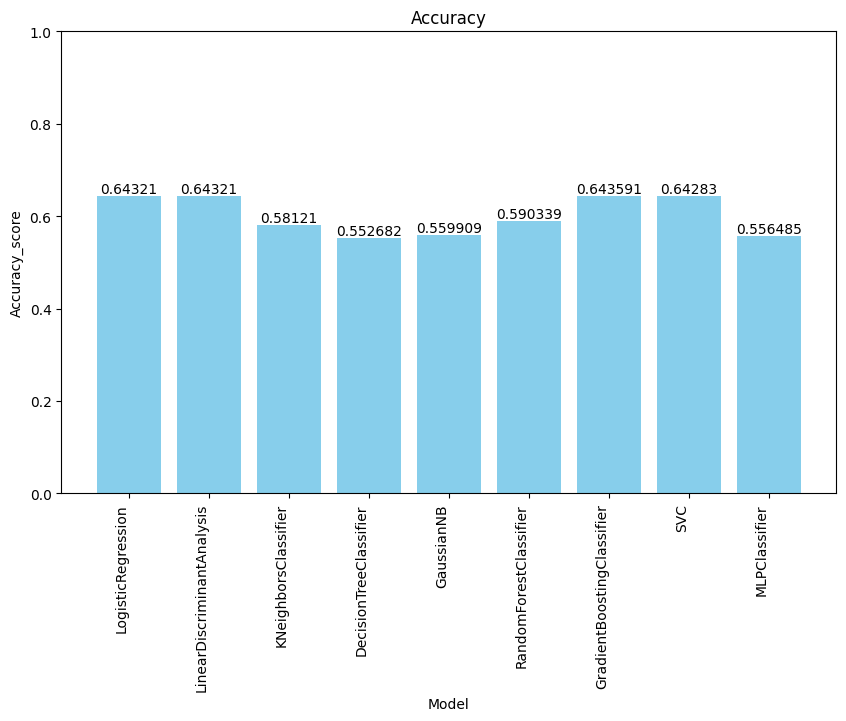

In [14]:

# List of classification models to evaluate
models = [LogisticRegression(),
         LinearDiscriminantAnalysis(),
         KNeighborsClassifier(),
         DecisionTreeClassifier(),
         GaussianNB(),
         RandomForestClassifier(n_estimators=11,random_state=42),
         GradientBoostingClassifier(),
         SVC(),
         MLPClassifier()]

accuracy_scores = []
model_names = []
# Iterate over each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    model_names.append(model.__class__.__name__)
    print("{} accuracy_score:{:.4f}\n".format(model, accuracy))

# Create a bar plot
plt.figure(figsize=(10, 6))
pl = plt.bar(model_names, accuracy_scores, color = 'skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy_score')
plt.bar_label(pl, label_type='edge')
plt.title('Accuracy')
plt.xticks(rotation = 90, ha = 'right')
plt.ylim(0, 1)
plt.show()